In [2]:
# To Get P values, the stats model API is used here

import statsmodels.api as sm
from scipy import stats
import numpy as np
import pandas as pd

# labels have a probablity of 0.5
y = [1, 1, 1, 1 , 0, 0 , 0, 0]

# when x = 1 prob of label .75, ie   p(y|x=1) = .75, so odds as 3/1
# when x = 0 prob of label is .25 p(y|x=0) = .25 so odds are 1/4
X= pd.DataFrame({'x':[1, 1, 1, 0,  1, 0, 0, 0]})

model = sm.Logit(endog=y, exog=X)
results = model.fit(method='bfgs', maxiter=100)

print(results.summary())

b1 = np.exp(results.params[0])

print('b1:', b1 )

# Find the new Pobablity of y, when x = 1 

print('new prob of y : b1 * 1/4 = {}'.format(b1* 1/4))

Optimization terminated successfully.
         Current function value: 0.627741
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    8
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            0
Date:                Mon, 11 Nov 2019   Pseudo R-squ.:                 0.09436
Time:                        15:14:20   Log-Likelihood:                -5.0219
converged:                       True   LL-Null:                       -5.5452
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.0986      1.155      0.9

### Logistic regression with a contstant added
Use the add_constant method that essentially adds a columns of ones to your data, by default the first column.
This is added to make a dataframe with a constant (ones) column and an X column


In [3]:
from statsmodels.tools import add_constant
x_withones = add_constant(X)
print(x_withones)

model = sm.Logit(endog=y, exog=x_withones)
results = model.fit(method='bfgs', maxiter=100)

print(results.summary())

   const  x
0    1.0  1
1    1.0  1
2    1.0  1
3    1.0  0
4    1.0  1
5    1.0  0
6    1.0  0
7    1.0  0
Optimization terminated successfully.
         Current function value: 0.562335
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    8
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Nov 2019   Pseudo R-squ.:                  0.1887
Time:                        15:14:20   Log-Likelihood:                -4.4987
converged:                       True   LL-Null:                       -5.5452
Covariance Type:            nonrobust   LLR p-value:                    0.1480
                 coef    std err          z      P>|z|      [0.025      0.975]
---------

/home/matthew/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Poisson Regression 
Poisson regression is a class of linear models applied when the out come is a poission distrobution


+ The probability of observing a single event over a small interval is approximately proportional to the size of that interval.
+ The probability of two events occurring in the same narrow interval is negligible.
+ The probability of an event within a certain interval does not change over different intervals.
+ The probability of an event in one interval is independent of the probability of an event in any other non-overlapping interval.


http://www.pmean.com/definitions/poisson.htm




{\displaystyle P(k{\text{ events in interval}})={\frac {\lambda ^{k}e^{-\lambda }}{k!}}}

With a high enough lambda, the poission distrobution essentially becomes normal


Best explanation
https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958

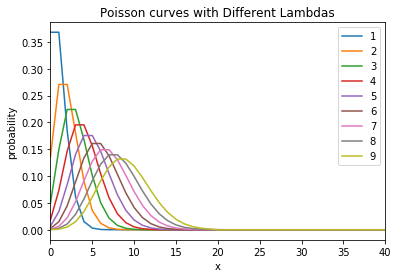

In [4]:
from math import factorial, exp
from matplotlib import pyplot as plt
%matplotlib inline
    
# define a function to estimate poission probablities
def pos(x, l=1):
    return (l ** x * exp(-l)) / factorial(x)
pos(100)


plt.figure()
x = np.arange(100)
r = range(1, 10)
## loop through different lambda and plot results
for l in r:
    y = list(map(lambda x: pos(x, l), x))

    plt.plot(x, y)
plt.legend(r)
plt.xlim(0, 40)
plt.title('Poisson curves with Different Lambdas')
plt.xlabel('x')
plt.ylabel('probability')
plt.show()


In [10]:
#Now with StatsModel Api
from statsmodels.discrete.discrete_model import Poisson

y = np.array([1, 2, 1, 1, 6])
x = np.array([0, 1, 0, 1, 1])


model =Poisson(endog=y, exog=add_constant(x))
results = model.fit()
print(results.summary())



Optimization terminated successfully.
         Current function value: 1.676978
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                    5
Model:                        Poisson   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Nov 2019   Pseudo R-squ.:                  0.1265
Time:                        15:16:48   Log-Likelihood:                -8.3849
converged:                       True   LL-Null:                       -9.5994
Covariance Type:            nonrobust   LLR p-value:                    0.1191
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.24e-16      0.707   1.75e-16      1.000      -1.386       1.386
x1             1.0986      0.

In [15]:
print('coefficent exponetiated {} '.format(np.exp(1.09)))
print('mean y :{} when x = 1'.format(np.mean(y[x ==1])))
print('mean y :{} when x = 0'.format(np.mean(y[x ==0])))

coefficent exponetiated 2.9742740725630656 
mean y :3.0 when x = 1
mean y :1.0 when x = 0
